# Lynch Data Loader Validation

---

| **Metadata** | **Value** |
|--------------|-----------|
| **Title** | Lynch Data Loader Validation |
| **Authors** | Jonathan Gong & Christopher Risi |
| **Created** | December 2025 |
| **Last Updated** | January 27, 2025 |
| **Dataset** | `Lynch` |
| **Notebook ID** | `0.03` |
| **Status** | WIP: Lynch data loader is missing some properties |

---

## Purpose

This notebook validates that the `lynch_2022` data loader correctly:

1. **Loads data from cache** - Verifies cached data loading works properly
2. **Populates all required properties** - Checks all `DatasetBase` properties are accessible
3. **Provides accurate validation statistics** - Confirms metrics and validation tables are correct
4. **Splits data correctly** - Validates train/validation data splits

## Expected Behavior

- All properties from `DatasetBase` should be accessible
- Cached and non-cached loads should produce identical results  
- Train/validation splits should be properly populated
- All public methods should return valid data

## Prerequisites

- Lynch dataset downloaded to `cache/data/lynch_2022/`
- Python environment with required dependencies installed

---

## 1. Setup and Imports

In [1]:
from src.data.diabetes_datasets.data_loader import get_loader
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

## 2. Load Data (Cached)

In [2]:
loader = get_loader(
    data_source_name="lynch_2022",
    dataset_type="train",
    use_cached=True,
    parallel=True,
    max_workers=14,
)

2026-01-28T21:02:53 - Initializing Lynch 2022 Data Loader...
2026-01-28T21:02:53 - Use of train_percentage parameter is currently not implemented: 0.9
2026-01-28T21:02:53 - ============================================================
2026-01-28T21:02:53 - Beginning data loading process with the following parameters:
2026-01-28T21:02:53 - 	Dataset: lynch_2022 - train
2026-01-28T21:02:53 - 	Columns: None
2026-01-28T21:02:53 - 	Generic patient start date: 2024-01-01 00:00:00
2026-01-28T21:02:53 - 	Number of validation days: 20
2026-01-28T21:02:53 - 	In parallel with up to 14 workers.

2026-01-28T21:03:07 - Loaded full processed data from cache for 343 patients
2026-01-28T21:03:11 - Loaded existing train/validation split from cache for 329 patients


## 3. Validate Required Properties

Every data loader should implement these properties from `DatasetBase`:

In [3]:
print(f"Dataset Description: {loader.description}")

Dataset Description: 
                Objective: 'To evaluate a transition from standard-of-care (SC) management of type 1 diabetes
                    (any insulin delivery method including hybrid closed-loop systems plus real-time continuous
                    glucose monitoring [CGM]) to use of the insulin-only configuration of the iLet® bionic
                    pancreas (BP) in 90 adults and children (age 6–71 years).'
                Title: 'The Insulin-Only Bionic Pancreas Pivotal Trial Extension Study: A Multi-Center Single-Arm
                    Evaluation of the Insulin-Only Configuration of the Bionic Pancreas in Adults and Youth with
                    Type 1 Diabetes'
                n = 440 participants using either insulin aspart, insulin lispro, or fast-acting insulin aspart
                Duration: 13 weeks
                Paper: https://journals.sagepub.com/doi/full/10.1089/dia.2022.0341
            


In [4]:
# Property: dataset_name
print(f"Dataset Name: {loader.dataset_name}")
assert loader.dataset_name == "lynch_2022", "Dataset name mismatch!"

Dataset Name: lynch_2022


In [5]:
# Property: num_patients
print(f"Number of Patients: {loader.num_patients}")
assert loader.num_patients > 0, "No patients loaded!"

Number of Patients: 343


In [6]:
# Property: patient_ids
print(f"Patient IDs: {loader.patient_ids}")
assert len(loader.patient_ids) == loader.num_patients, "Patient ID count mismatch!"

Patient IDs: ['lynch_71', 'lynch_151', 'lynch_389', 'lynch_564', 'lynch_97', 'lynch_457', 'lynch_360', 'lynch_338', 'lynch_400', 'lynch_396', 'lynch_574', 'lynch_141', 'lynch_3', 'lynch_447', 'lynch_592', 'lynch_410', 'lynch_328', 'lynch_119', 'lynch_39', 'lynch_214', 'lynch_36', 'lynch_116', 'lynch_198', 'lynch_295', 'lynch_273', 'lynch_51', 'lynch_171', 'lynch_224', 'lynch_126', 'lynch_317', 'lynch_318', 'lynch_468', 'lynch_187', 'lynch_350', 'lynch_467', 'lynch_188', 'lynch_554', 'lynch_234', 'lynch_139', 'lynch_503', 'lynch_430', 'lynch_307', 'lynch_4', 'lynch_146', 'lynch_391', 'lynch_573', 'lynch_69', 'lynch_378', 'lynch_377', 'lynch_440', 'lynch_417', 'lynch_111', 'lynch_31', 'lynch_79', 'lynch_254', 'lynch_156', 'lynch_76', 'lynch_367', 'lynch_90', 'lynch_407', 'lynch_408', 'lynch_203', 'lynch_534', 'lynch_21', 'lynch_101', 'lynch_357', 'lynch_282', 'lynch_358', 'lynch_486', 'lynch_553', 'lynch_46', 'lynch_166', 'lynch_504', 'lynch_233', 'lynch_131', 'lynch_300', 'lynch_438', '

In [7]:
# Property: data_shape_summary
print("Data Shape Summary:")
for patient_id, shape in loader.data_shape_summary.items():
    print(f"  {patient_id}: {shape}")

Data Shape Summary:
  lynch_71: (47129, 19)
  lynch_151: (27318, 19)
  lynch_389: (28208, 19)
  lynch_564: (27036, 19)
  lynch_97: (28199, 19)
  lynch_457: (27936, 19)
  lynch_360: (25949, 19)
  lynch_338: (27331, 19)
  lynch_400: (28207, 19)
  lynch_396: (26471, 19)
  lynch_574: (27300, 19)
  lynch_141: (26164, 19)
  lynch_3: (26177, 19)
  lynch_447: (26187, 19)
  lynch_592: (27903, 19)
  lynch_410: (27909, 19)
  lynch_328: (26214, 19)
  lynch_119: (27670, 19)
  lynch_39: (26733, 19)
  lynch_214: (26177, 19)
  lynch_36: (26999, 19)
  lynch_116: (27612, 19)
  lynch_198: (27962, 19)
  lynch_295: (26195, 19)
  lynch_273: (28467, 19)
  lynch_51: (27339, 19)
  lynch_171: (34114, 19)
  lynch_224: (27288, 19)
  lynch_126: (26210, 19)
  lynch_317: (5545, 19)
  lynch_318: (27076, 19)
  lynch_468: (26154, 19)
  lynch_187: (28205, 19)
  lynch_350: (27043, 19)
  lynch_467: (28203, 19)
  lynch_188: (26748, 19)
  lynch_554: (68122, 19)
  lynch_234: (27904, 19)
  lynch_139: (28212, 19)
  lynch_503: 

In [8]:
# Property: dataset_info
print("Dataset Info:")
for key, value in loader.dataset_info.items():
    if isinstance(value, dict) and len(str(value)) > 100:
        print(f"  {key}: <dict with {len(value)} items>")
    else:
        print(f"  {key}: {value}")

Dataset Info:


AttributeError: 'Lynch2022DataLoader' object has no attribute 'dataset_info'

## 4. Validate Data Containers

Check that `processed_data`, `train_data`, and `validation_data` are properly populated.

In [ ]:
# Check processed_data
print("Processed Data:")
assert loader.processed_data is not None, "processed_data is None!"
assert isinstance(loader.processed_data, dict), "processed_data should be a dict!"
print(f"  Type: {type(loader.processed_data).__name__}")
print(f"  Number of patients: {len(loader.processed_data)}")

Processed Data:
  Type: dict
  Number of patients: 343


In [ ]:
# Check train_data
print("Train Data:")
assert loader.train_data is not None, "train_data is None!"
assert isinstance(loader.train_data, dict), "train_data should be a dict!"
print(f"  Type: {type(loader.train_data).__name__}")
print(f"  Number of patients: {len(loader.train_data)}")
for patient_id, df in loader.train_data.items():
    print(f"  {patient_id}: {df.shape}")

Train Data:
  Type: dict
  Number of patients: 329
  lynch_10: (44723, 19)
  lynch_107: (56531, 19)
  lynch_138: (20330, 19)
  lynch_143: (20404, 19)
  lynch_13: (21215, 19)
  lynch_135: (21227, 19)
  lynch_103: (20635, 19)
  lynch_111: (20352, 19)
  lynch_126: (20374, 19)
  lynch_121: (20345, 19)
  lynch_105: (21827, 19)
  lynch_131: (22105, 19)
  lynch_153: (20378, 19)
  lynch_133: (22401, 19)
  lynch_130: (21250, 19)
  lynch_100: (20392, 19)
  lynch_134: (20091, 19)
  lynch_101: (20388, 19)
  lynch_171: (28307, 19)
  lynch_148: (20376, 19)
  lynch_144: (20379, 19)
  lynch_128: (21248, 19)
  lynch_141: (20351, 19)
  lynch_116: (21815, 19)
  lynch_125: (21812, 19)
  lynch_137: (20382, 19)
  lynch_12: (20395, 19)
  lynch_139: (22354, 19)
  lynch_119: (21804, 19)
  lynch_113: (20347, 19)
  lynch_112: (21788, 19)
  lynch_151: (21502, 19)
  lynch_176: (20672, 19)
  lynch_154: (20415, 19)
  lynch_198: (22091, 19)
  lynch_155: (22334, 19)
  lynch_17: (8562, 19)
  lynch_156: (20909, 19)
  ly

In [ ]:
# Check validation_data
print("Validation Data:")
assert loader.validation_data is not None, "validation_data is None!"
assert isinstance(loader.validation_data, dict), "validation_data should be a dict!"
print(f"  Type: {type(loader.validation_data).__name__}")
print(f"  Number of patients: {len(loader.validation_data)}")
for patient_id, df in loader.validation_data.items():
    print(f"  {patient_id}: {df.shape}")

Validation Data:
  Type: dict
  Number of patients: 329
  lynch_10: (5761, 19)
  lynch_107: (5761, 19)
  lynch_138: (5761, 19)
  lynch_143: (5761, 19)
  lynch_13: (5761, 19)
  lynch_135: (5761, 19)
  lynch_103: (5761, 19)
  lynch_111: (5761, 19)
  lynch_126: (5761, 19)
  lynch_121: (5761, 19)
  lynch_105: (5761, 19)
  lynch_131: (5761, 19)
  lynch_153: (5761, 19)
  lynch_133: (5761, 19)
  lynch_130: (5761, 19)
  lynch_100: (5761, 19)
  lynch_134: (5761, 19)
  lynch_101: (5761, 19)
  lynch_171: (5761, 19)
  lynch_148: (5761, 19)
  lynch_144: (5761, 19)
  lynch_128: (5761, 19)
  lynch_141: (5761, 19)
  lynch_116: (5761, 19)
  lynch_125: (5761, 19)
  lynch_137: (5761, 19)
  lynch_12: (5761, 19)
  lynch_139: (5761, 19)
  lynch_119: (5761, 19)
  lynch_113: (5761, 19)
  lynch_112: (5761, 19)
  lynch_151: (5761, 19)
  lynch_176: (5761, 19)
  lynch_154: (5761, 19)
  lynch_198: (5761, 19)
  lynch_155: (5761, 19)
  lynch_17: (5761, 19)
  lynch_156: (5761, 19)
  lynch_167: (5761, 19)
  lynch_170:

## 5. Validate Public Methods

In [ ]:
# Method: get_patient_data()
sample_patient_id = loader.patient_ids[0]
patient_data = loader.get_patient_data(sample_patient_id)

print(f"get_patient_data('{sample_patient_id}'):")
assert patient_data is not None, "get_patient_data returned None!"
print(f"  Shape: {patient_data.shape}")
print(f"  Columns: {list(patient_data.columns)}")
print(f"  Index type: {type(patient_data.index).__name__}")
print(f"  Date range: {patient_data.index.min()} to {patient_data.index.max()}")

AttributeError: 'Lynch2022DataLoader' object has no attribute 'get_patient_data'

In [ ]:
# Method: get_combined_data()
print("get_combined_data() options:")

combined_all = loader.get_combined_data(data_type="all")
print(f"  data_type='all': {combined_all.shape}")

combined_train = loader.get_combined_data(data_type="train")
print(f"  data_type='train': {combined_train.shape}")

combined_val = loader.get_combined_data(data_type="validation")
print(f"  data_type='validation': {combined_val.shape}")

get_combined_data() options:


AttributeError: 'Lynch2022DataLoader' object has no attribute 'get_combined_data'

## 6. Validation Statistics

Display comprehensive validation metrics computed by the loader.

In [ ]:
# Data metrics (if available)
if hasattr(loader, "data_metrics") and loader.data_metrics:
    print("Data Metrics:")
    for key, value in loader.data_metrics.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.4f}")
        else:
            print(f"  {key}: {value}")
else:
    print("No data_metrics available.")

No data_metrics available.


In [ ]:
# Create validation table
if hasattr(loader, "create_validation_table"):
    validation_table = loader.create_validation_table()
    print("Validation Table:")
    display(validation_table)
else:
    print("create_validation_table() method not available.")

Validation Table:


,patient_id,num_days,num_data_points,start_date,end_date,date_type,age,sex,avg_bg_mM,min_bg_mM,max_bg_mM,avg_carbs_g,min_carbs_g,max_carbs_g,avg_insulin_units,min_insulin_units,max_insulin_units,num_train_data_points,num_validation_data_points
0,lynch_336,97,27574,2020-11-09 16:44:09,2021-02-13 10:29:09,real,10.0,M,8.848380,2.17,22.28,0.0,0.0,0.0,0.210257,0.01,11.99,21771.0,5761.0
1,lynch_339,91,25964,2021-01-15 10:01:08,2021-04-15 13:36:08,real,11.0,F,10.322408,2.17,22.28,0.0,0.0,0.0,0.442673,0.01,17.38,20123.0,5761.0
2,lynch_38,98,27920,2021-02-12 11:07:25,2021-05-20 09:42:25,real,12.0,M,7.790038,2.17,18.17,0.0,0.0,0.0,0.063017,0.01,2.12,22126.0,5761.0
3,lynch_205,90,25634,2020-09-21 09:18:50,2020-12-19 09:23:50,real,32.0,M,9.081310,2.17,22.28,0.0,0.0,0.0,0.186258,0.01,8.12,19844.0,5761.0
4,lynch_37,97,27626,2020-04-27 15:27:32,2020-08-01 13:32:32,real,7.0,M,9.012343,2.17,22.28,0.0,0.0,0.0,0.177263,0.01,11.84,21786.0,5761.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,lynch_241,92,26233,2021-04-15 11:29:10,2021-07-15 13:29:10,real,20.0,F,8.246587,2.17,22.28,0.0,0.0,0.0,0.087514,0.01,7.91,20394.0,5761.0
339,lynch_372,99,28218,2020-04-25 10:32:57,2020-08-01 09:57:57,real,2.0,M,8.950244,2.17,20.78,0.0,0.0,0.0,0.238923,0.01,11.00,22421.0,5761.0
340,lynch_445,93,26464,2020-07-18 11:42:36,2020-10-18 08:57:36,real,11.0,M,10.184317,2.17,22.28,0.0,0.0,0.0,0.580056,0.01,25.52,20679.0,5761.0
341,lynch_590,163,46771,2020-10-06 00:03:24,2021-03-17 09:33:24,real,4.0,F,9.422508,2.17,22.28,0.0,0.0,0.0,0.173812,0.01,11.04,40979.0,5761.0


### 6.1 Data Distribution Visualizations

AttributeError: 'Lynch2022DataLoader' object has no attribute 'get_combined_data'

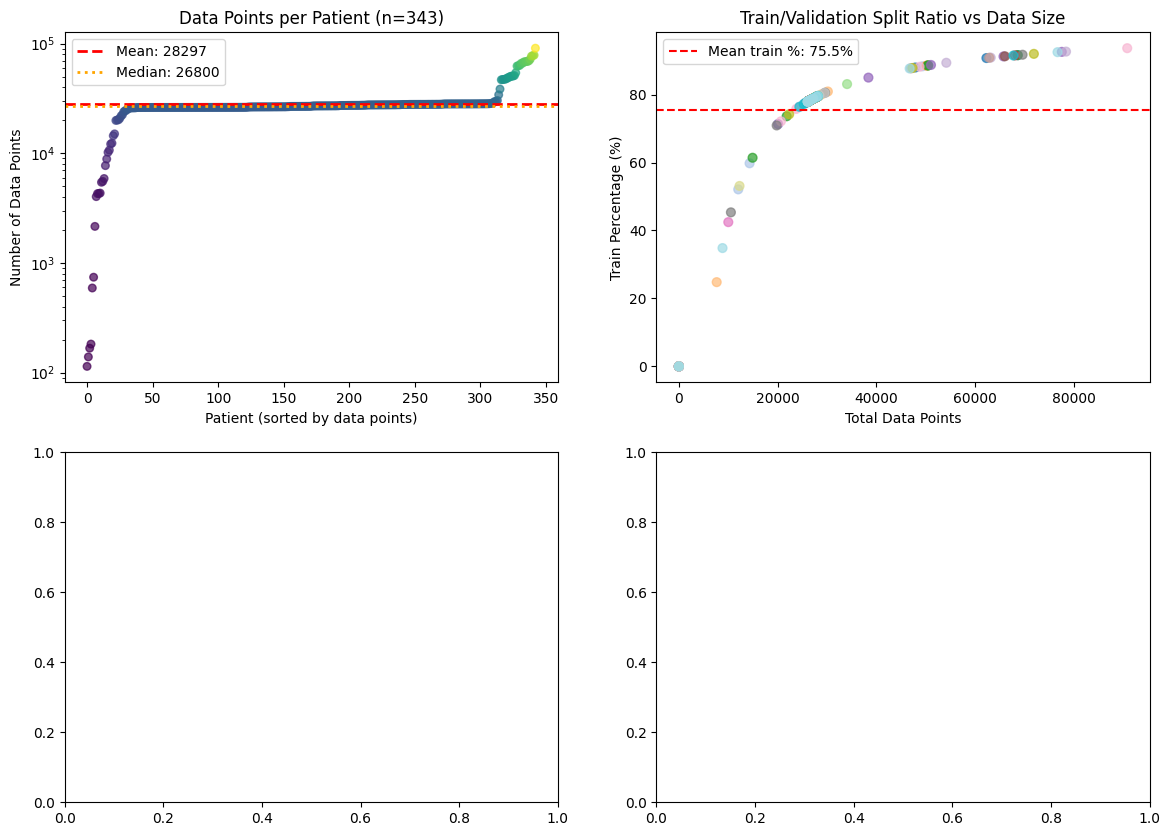

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

patient_ids = list(loader.processed_data.keys())
data_points = [len(df) for df in loader.processed_data.values()]

# Plot 1: Scatter plot of data points per patient (sorted by size)
ax1 = axes[0, 0]
sorted_indices = np.argsort(data_points)
sorted_points = np.array(data_points)[sorted_indices]
ax1.scatter(
    range(len(patient_ids)),
    sorted_points,
    c=sorted_points,
    cmap="viridis",
    s=30,
    alpha=0.7,
)
ax1.axhline(
    y=np.mean(data_points),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {np.mean(data_points):.0f}",
)
ax1.axhline(
    y=np.median(data_points),
    color="orange",
    linestyle=":",
    linewidth=2,
    label=f"Median: {np.median(data_points):.0f}",
)
ax1.set_xlabel("Patient (sorted by data points)")
ax1.set_ylabel("Number of Data Points")
ax1.set_title(f"Data Points per Patient (n={len(patient_ids)})")
ax1.legend()
ax1.set_yscale("log") if max(data_points) / min(data_points) > 10 else None

# Plot 2: Train vs Validation ratio scatter
ax2 = axes[0, 1]
if loader.train_data and loader.validation_data:
    train_points = [len(loader.train_data.get(pid, [])) for pid in patient_ids]
    val_points = [len(loader.validation_data.get(pid, [])) for pid in patient_ids]
    total_points = [t + v for t, v in zip(train_points, val_points)]
    train_ratio = [
        t / tot * 100 if tot > 0 else 0 for t, tot in zip(train_points, total_points)
    ]

    scatter = ax2.scatter(
        total_points,
        train_ratio,
        c=range(len(patient_ids)),
        cmap="tab20",
        s=40,
        alpha=0.7,
    )
    ax2.axhline(
        y=np.mean(train_ratio),
        color="red",
        linestyle="--",
        label=f"Mean train %: {np.mean(train_ratio):.1f}%",
    )
    ax2.set_xlabel("Total Data Points")
    ax2.set_ylabel("Train Percentage (%)")
    ax2.set_title("Train/Validation Split Ratio vs Data Size")
    ax2.legend()
else:
    ax2.text(
        0.5,
        0.5,
        "No train/validation split available",
        ha="center",
        va="center",
        transform=ax2.transAxes,
    )

# Plot 3: Blood glucose distribution (histogram with KDE-style smoothing)
ax3 = axes[1, 0]
combined_data = loader.get_combined_data(data_type="all")
bg_col = (
    "bg_mM"
    if "bg_mM" in combined_data.columns
    else "bg_mg_dl"
    if "bg_mg_dl" in combined_data.columns
    else None
)

if bg_col:
    bg_data = combined_data[bg_col].dropna()
    bg_unit = "mM" if bg_col == "bg_mM" else "mg/dL"
    hypo = 3.9 if bg_col == "bg_mM" else 70
    hyper = 10.0 if bg_col == "bg_mM" else 180

    ax3.hist(
        bg_data, bins=100, density=True, color="purple", edgecolor="none", alpha=0.6
    )
    ax3.axvline(
        x=bg_data.mean(),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {bg_data.mean():.2f}",
    )
    ax3.axvline(
        x=bg_data.median(),
        color="blue",
        linestyle=":",
        linewidth=2,
        label=f"Median: {bg_data.median():.2f}",
    )
    ax3.axvspan(
        hypo, hyper, alpha=0.15, color="green", label=f"Target range ({hypo}-{hyper})"
    )
    ax3.set_xlabel(f"Blood Glucose ({bg_unit})")
    ax3.set_ylabel("Density")
    ax3.set_title(f"Blood Glucose Distribution (n={len(bg_data):,})")
    ax3.legend(fontsize=8)
else:
    ax3.text(
        0.5,
        0.5,
        "No blood glucose column found",
        ha="center",
        va="center",
        transform=ax3.transAxes,
    )

# Plot 4: Data duration distribution (histogram)
ax4 = axes[1, 1]
durations = []
for pid, df in loader.processed_data.items():
    if hasattr(df.index, "min") and hasattr(df.index, "max"):
        try:
            duration = (df.index.max() - df.index.min()).days
            durations.append(duration)
        except (TypeError, AttributeError):
            pass

if durations:
    ax4.hist(
        durations,
        bins=min(30, len(set(durations))),
        color="teal",
        edgecolor="black",
        alpha=0.7,
    )
    ax4.axvline(
        x=np.mean(durations),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {np.mean(durations):.1f} days",
    )
    ax4.axvline(
        x=np.median(durations),
        color="orange",
        linestyle=":",
        linewidth=2,
        label=f"Median: {np.median(durations):.1f} days",
    )
    ax4.set_xlabel("Days of Data")
    ax4.set_ylabel("Number of Patients")
    ax4.set_title(f"Data Duration Distribution (n={len(durations)} patients)")
    ax4.legend()

plt.tight_layout()
plt.show()

### 6.2 Per-Patient Blood Glucose Statistics

AttributeError: 'Lynch2022DataLoader' object has no attribute 'get_combined_data'

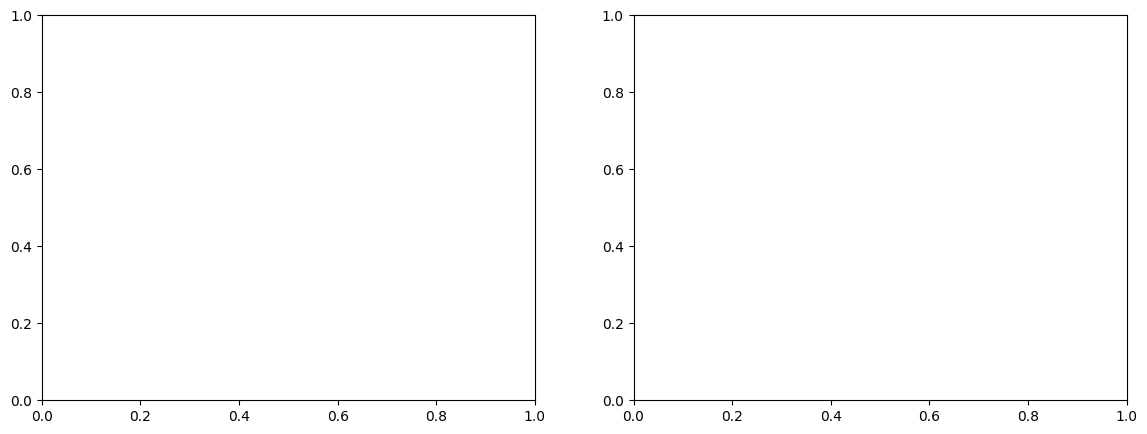

In [ ]:
# Per-patient BG statistics - scatter plot visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

patient_ids = list(loader.processed_data.keys())

# Determine which BG column to use
bg_col = "bg_mM" if "bg_mM" in loader.get_combined_data().columns else "bg_mg_dl"
bg_unit = "mM" if bg_col == "bg_mM" else "mg/dL"

# Calculate per-patient statistics
patient_stats = []
for pid in patient_ids:
    df = loader.processed_data[pid]
    if bg_col in df.columns:
        bg = df[bg_col].dropna()
        if len(bg) > 0:
            patient_stats.append(
                {
                    "pid": pid,
                    "mean": bg.mean(),
                    "std": bg.std(),
                    "min": bg.min(),
                    "max": bg.max(),
                    "count": len(bg),
                }
            )

# Plot 1: Mean vs Std scatter (bubble size = data count)
ax1 = axes[0]
means = [s["mean"] for s in patient_stats]
stds = [s["std"] for s in patient_stats]
counts = [s["count"] for s in patient_stats]

# Normalize counts for bubble size
size_scale = np.array(counts) / max(counts) * 200 + 20

scatter = ax1.scatter(
    means,
    stds,
    s=size_scale,
    c=counts,
    cmap="plasma",
    alpha=0.6,
    edgecolors="black",
    linewidth=0.5,
)
ax1.set_xlabel(f"Mean Blood Glucose ({bg_unit})")
ax1.set_ylabel(f"Std Dev Blood Glucose ({bg_unit})")
ax1.set_title("Patient BG Variability (bubble size = data points)")
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label("Data Points")

# Add overall mean lines
ax1.axvline(
    x=np.mean(means),
    color="red",
    linestyle="--",
    alpha=0.7,
    label=f"Mean of means: {np.mean(means):.2f}",
)
ax1.axhline(
    y=np.mean(stds),
    color="blue",
    linestyle="--",
    alpha=0.7,
    label=f"Mean of stds: {np.mean(stds):.2f}",
)
ax1.legend(fontsize=8)

# Plot 2: Min-Max range scatter
ax2 = axes[1]
mins = [s["min"] for s in patient_stats]
maxs = [s["max"] for s in patient_stats]
ranges = [s["max"] - s["min"] for s in patient_stats]

scatter2 = ax2.scatter(
    mins,
    maxs,
    s=50,
    c=ranges,
    cmap="RdYlGn_r",
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
ax2.plot(
    [min(mins), max(maxs)],
    [min(mins), max(maxs)],
    "k--",
    alpha=0.3,
    label="Min=Max line",
)
ax2.set_xlabel(f"Minimum BG ({bg_unit})")
ax2.set_ylabel(f"Maximum BG ({bg_unit})")
ax2.set_title("Patient BG Range (color = range size)")
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label(f"Range ({bg_unit})")

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary across {len(patient_stats)} patients:")
print(f"  Mean BG: {np.mean(means):.2f} ± {np.std(means):.2f} {bg_unit}")
print(f"  Mean Std Dev: {np.mean(stds):.2f} ± {np.std(stds):.2f} {bg_unit}")
print(f"  Mean Range: {np.mean(ranges):.2f} {bg_unit}")

### 6.3 Time-in-Range Analysis

NameError: name 'bg_col' is not defined

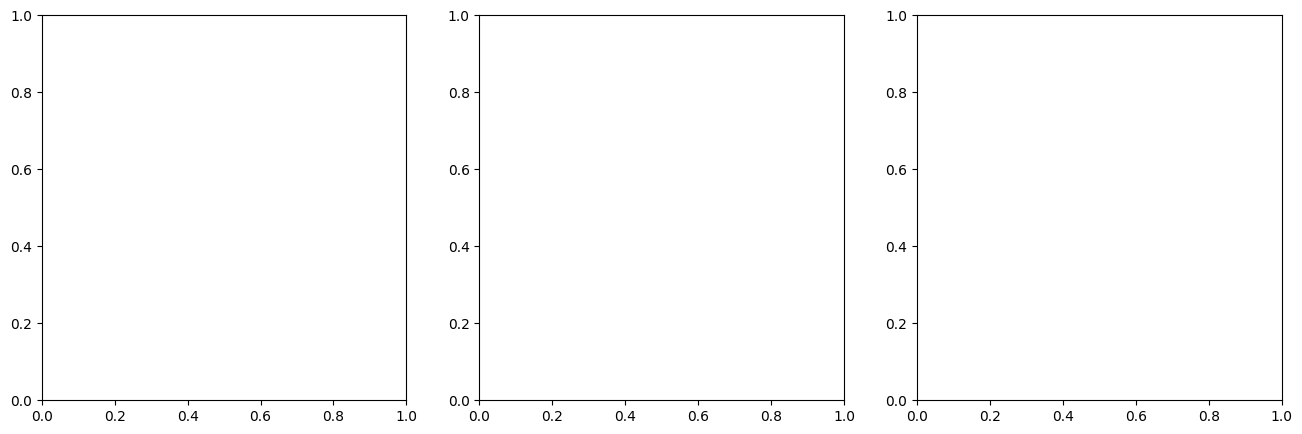

In [ ]:
# Time-in-Range Analysis - scatter and distribution plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Define thresholds based on unit
if bg_col == "bg_mM":
    target_low, target_high = 3.9, 10.0
else:
    target_low, target_high = 70, 180

# Calculate time-in-range for each patient
tir_stats = []
for pid in patient_ids:
    df = loader.processed_data[pid]
    if bg_col in df.columns:
        bg = df[bg_col].dropna()
        total = len(bg)
        if total > 0:
            below = (bg < target_low).sum() / total * 100
            above = (bg > target_high).sum() / total * 100
            in_range = 100 - below - above
            tir_stats.append(
                {
                    "pid": pid,
                    "below": below,
                    "in_range": in_range,
                    "above": above,
                    "count": total,
                }
            )

below_pcts = [s["below"] for s in tir_stats]
in_range_pcts = [s["in_range"] for s in tir_stats]
above_pcts = [s["above"] for s in tir_stats]
counts = [s["count"] for s in tir_stats]

# Plot 1: Scatter - Time in Range vs Time Below (hypo risk visualization)
ax1 = axes[0]
scatter1 = ax1.scatter(
    in_range_pcts,
    below_pcts,
    s=60,
    c=above_pcts,
    cmap="YlOrRd",
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
ax1.set_xlabel("Time in Range (%)")
ax1.set_ylabel("Time Below Range - Hypo (%)")
ax1.set_title("Glycemic Control: TIR vs Hypoglycemia")
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label("Time Above Range (%)")
ax1.axhline(y=4, color="red", linestyle="--", alpha=0.5, label="4% hypo threshold")
ax1.axvline(x=70, color="green", linestyle="--", alpha=0.5, label="70% TIR target")
ax1.legend(fontsize=8)

# Plot 2: Distribution of Time-in-Range (histogram)
ax2 = axes[1]
ax2.hist(
    in_range_pcts,
    bins=20,
    color="#2ECC71",
    edgecolor="black",
    alpha=0.7,
    label="In Range",
)
ax2.axvline(
    x=np.mean(in_range_pcts),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {np.mean(in_range_pcts):.1f}%",
)
ax2.axvline(
    x=np.median(in_range_pcts),
    color="blue",
    linestyle=":",
    linewidth=2,
    label=f"Median: {np.median(in_range_pcts):.1f}%",
)
ax2.axvline(
    x=70, color="green", linestyle="-", linewidth=2, alpha=0.5, label="70% Target"
)
ax2.set_xlabel("Time in Range (%)")
ax2.set_ylabel("Number of Patients")
ax2.set_title(f"Time-in-Range Distribution (n={len(tir_stats)})")
ax2.legend(fontsize=8)

# Plot 3: Overall cohort pie chart
ax3 = axes[2]
combined_bg = loader.get_combined_data()[bg_col].dropna()
total = len(combined_bg)

if total > 0:
    overall_below = (combined_bg < target_low).sum() / total * 100
    overall_above = (combined_bg > target_high).sum() / total * 100
    overall_in_range = 100 - overall_below - overall_above

    sizes = [overall_below, overall_in_range, overall_above]
    labels = [
        f"Below\n{overall_below:.1f}%",
        f"In Range\n{overall_in_range:.1f}%",
        f"Above\n{overall_above:.1f}%",
    ]
    colors = ["#E74C3C", "#2ECC71", "#F39C12"]
    explode = (0.02, 0.05, 0.02)

    wedges, texts = ax3.pie(
        sizes,
        labels=labels,
        colors=colors,
        explode=explode,
        startangle=90,
        textprops={"fontsize": 10, "fontweight": "bold"},
    )
    ax3.set_title(f"Overall Time-in-Range\n(n={total:,} readings)")

plt.tight_layout()
plt.show()

# Print TIR summary
print(f"\nTime-in-Range Summary ({len(tir_stats)} patients):")
print(f"  Mean TIR: {np.mean(in_range_pcts):.1f}% (target: >70%)")
print(f"  Mean Time Below: {np.mean(below_pcts):.1f}% (target: <4%)")
print(f"  Mean Time Above: {np.mean(above_pcts):.1f}% (target: <25%)")
print(
    f"  Patients meeting 70% TIR: {sum(1 for t in in_range_pcts if t >= 70)}/{len(tir_stats)}"
)

## 7. Sample Data Inspection

Quick look at the actual data content for one patient.

In [ ]:
sample_patient_id = loader.patient_ids[0]
sample_df = loader.get_patient_data(sample_patient_id)

print(f"Sample data for patient '{sample_patient_id}':")
print("\nFirst 5 rows:")
display(sample_df.head())

print("\nLast 5 rows:")
display(sample_df.tail())

print("\nData types:")
print(sample_df.dtypes)

AttributeError: 'Lynch2022DataLoader' object has no attribute 'get_patient_data'

In [ ]:
# Basic statistics for numeric columns
print(f"\nDescriptive statistics for patient '{sample_patient_id}':")
display(sample_df.describe())


Descriptive statistics for patient 'lynch_336':


NameError: name 'sample_df' is not defined

## 8. Validation Summary

Final checks to confirm the data loader is working correctly.

In [ ]:
print("=" * 60)
print("VALIDATION SUMMARY")
print("=" * 60)

checks = [
    ("dataset_name property", loader.dataset_name is not None),
    ("num_patients property", loader.num_patients > 0),
    ("patient_ids property", len(loader.patient_ids) > 0),
    (
        "processed_data populated",
        loader.processed_data is not None and len(loader.processed_data) > 0,
    ),
    (
        "train_data populated",
        loader.train_data is not None and len(loader.train_data) > 0,
    ),
    (
        "validation_data populated",
        loader.validation_data is not None and len(loader.validation_data) > 0,
    ),
    (
        "get_patient_data() works",
        loader.get_patient_data(loader.patient_ids[0]) is not None,
    ),
    ("get_combined_data() works", not loader.get_combined_data().empty),
]

all_passed = True
for check_name, passed in checks:
    status = "✅ PASS" if passed else "❌ FAIL"
    print(f"  {status}: {check_name}")
    if not passed:
        all_passed = False

print("=" * 60)
if all_passed:
    print("All validation checks PASSED!")
else:
    print("Some validation checks FAILED. Please review.")

VALIDATION SUMMARY


AttributeError: 'Lynch2022DataLoader' object has no attribute 'get_patient_data'